In [15]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload() #Upload your kaggle.json file

In [4]:
!mkdir -p ~/.kaggle
!cp "your-kaggle-file-name" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

In [6]:
# Open the zip file
import zipfile
with zipfile.ZipFile("cat-and-dog.zip", "r") as zip_ref:
  zip_ref.extractall("data/")

In [9]:
base_dir = './data/training_set/training_set'
print("Files:", os.listdir(base_dir))

Files: ['cats', 'dogs']


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [13]:
#Prepare the model

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(150,150,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/tmp/ipython-input-13-219171045.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
#Train the model

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 173s 830ms/step - accuracy: 0.9061 - loss: 0.2450 - val_accuracy: 0.9550 - val_loss: 0.0991
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 193s 787ms/step - accuracy: 0.9592 - loss: 0.1125 - val_accuracy: 0.9575 - val_loss: 0.0977
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 213s 844ms/step - accuracy: 0.9612 - loss: 0.1015 - val_accuracy: 0.9650 - val_loss: 0.0862
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 159s 790ms/step - accuracy: 0.9706 - loss: 0.0778 - val_accuracy: 0.9582 - val_loss: 0.0953
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 219s 878ms/step - accuracy: 0.9684 - loss: 0.0810 - val_accuracy: 0.9644 - val_loss: 0.0853
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 175s 871ms/step - accuracy: 0.9747 - loss: 0.0674 - val_accuracy: 0.9613 - val_loss: 0.0943
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 159s 791ms/step - accuracy: 0.9735 - loss: 0.0687 - val_accuracy: 0.9669 - val_loss: 0.0839
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 154s 767ms/step - accuracy: 0.9764 -

In [17]:
#Fine tune to have a better result

base_model.trainable = True

fine_tune_at = len(base_model.layers) - 50

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = True

In [19]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [21]:
# Last 5 layers are added to finetuning

fine_tune_epochs = 5
total_epochs = 10 + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs = total_epochs,
    initial_epoch = history.epoch[-1]
 )

Epoch 10/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 662s 3s/step - accuracy: 0.8395 - loss: 0.4172 - val_accuracy: 0.9450 - val_loss: 0.1814
Epoch 11/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 610s 3s/step - accuracy: 0.9335 - loss: 0.1625 - val_accuracy: 0.9469 - val_loss: 0.1503
Epoch 12/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 612s 3s/step - accuracy: 0.9472 - loss: 0.1219 - val_accuracy: 0.9544 - val_loss: 0.1252
Epoch 13/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 620s 3s/step - accuracy: 0.9569 - loss: 0.1079 - val_accuracy: 0.9575 - val_loss: 0.1116
Epoch 14/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 611s 3s/step - accuracy: 0.9685 - loss: 0.0828 - val_accuracy: 0.9631 - val_loss: 0.1007
Epoch 15/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.9801 - loss: 0.0592 - val_accuracy: 0.9681 - val_loss: 0.0914


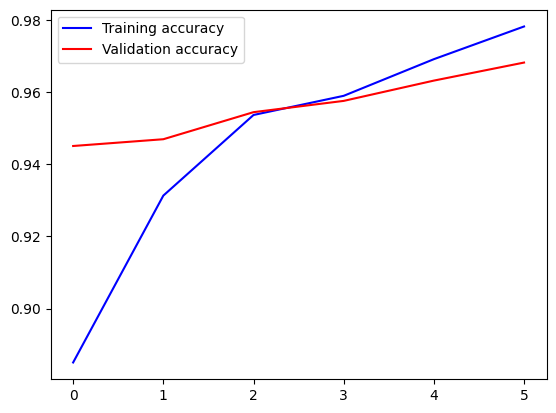

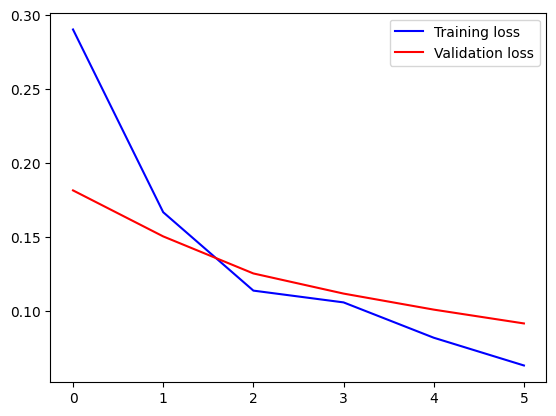

In [22]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.show()


In [23]:
model.save("cat_vs_dog_finetuned_model.h5")


In [37]:
#Test with your image

from tensorflow.keras.preprocessing import image
import numpy as np

def prepare_image(img_path, target_size=(150,150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


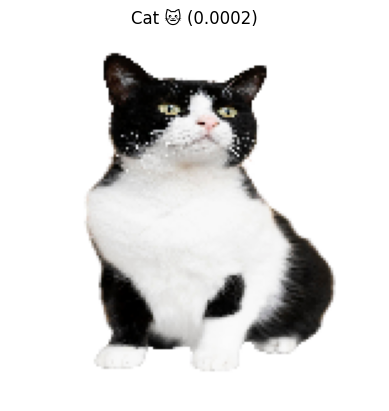

In [41]:
img_path = "your-image-path"
img_array, img = prepare_image(img_path)
prediction = model.predict(img_array)[0][0]

plt.imshow(img)
plt.axis('off')
plt.title(f"{'Dog 🐶' if prediction > 0.5 else 'Cat 🐱'} ({prediction:.4f})")
plt.show()
